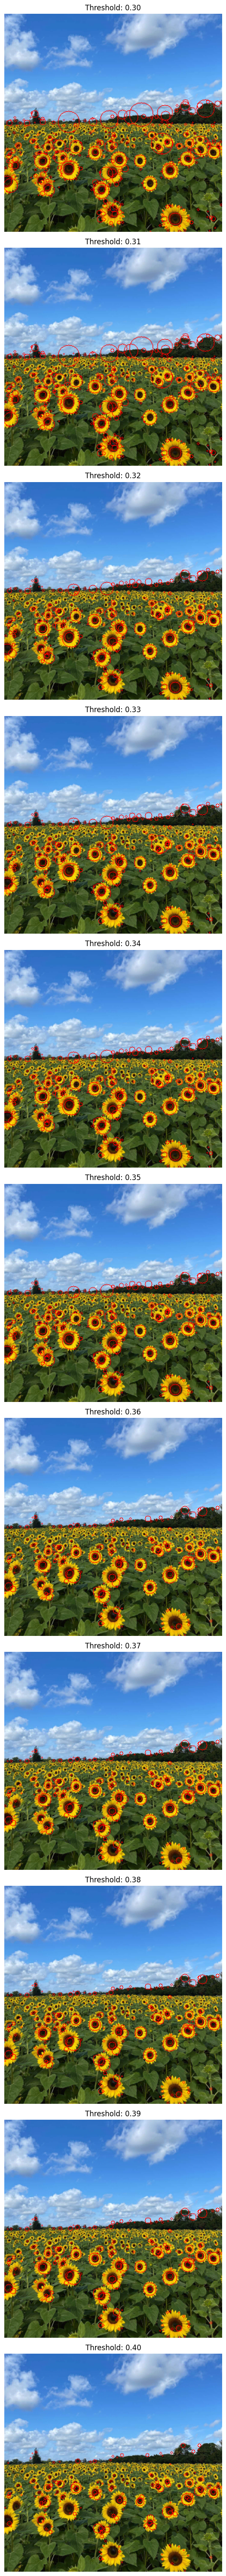

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the sunflower field image
sunflower_image = cv2.imread('the_berry_farms_sunflower_field.jpeg', cv2.IMREAD_REDUCED_COLOR_4)

# Convert to grayscale for blob detection
gray_sunflower_image = cv2.cvtColor(sunflower_image, cv2.COLOR_BGR2GRAY)

# Parameters for scale-space extrema detection
min_sigma_value = 1.0  # Minimum sigma for Gaussian blur (small blobs)
max_sigma_value = 2.0  # Maximum sigma for Gaussian blur (larger blobs)
num_sigma_values = 2 # Number of sigma values to test (scales)


# Plot blob detected pictures for thresholds 0.3 to 0.4 with step 0.01
thresholds = np.arange(0.3, 0.41, 0.01)
fig, axes = plt.subplots(len(thresholds), 1, figsize=(20, 20))

fig.set_size_inches(40, 60)

for ax, threshold in zip(axes, thresholds):
    blob_detection_mask = abs_laplacian_image > threshold * abs_laplacian_image.max()
    output_image = sunflower_image.copy()
    contours, _ = cv2.findContours(blob_detection_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in contours:
        if len(contour) >= 5:
            (x, y), radius = cv2.minEnclosingCircle(contour)
            circle_center = (int(x), int(y))
            radius = int(radius)
            cv2.circle(output_image, circle_center, radius, (0, 0, 255), circle_line_thickness)
    
    ax.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    ax.axis('off')
    ax.set_title(f'Threshold: {threshold:.2f}')

plt.tight_layout()
plt.show()







Parameters of the largest circle:
Center: (110, 258)
Radius: 15
Sigma value: 2.0


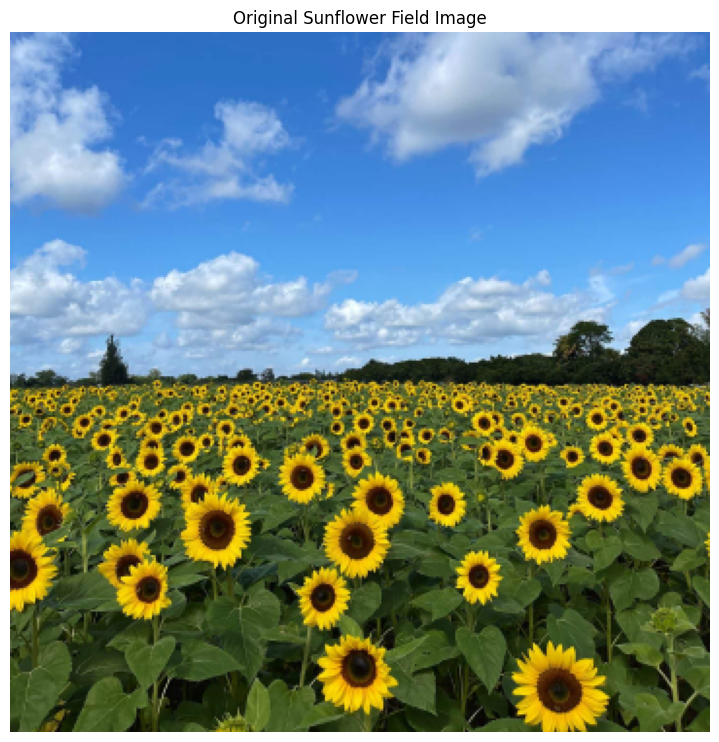

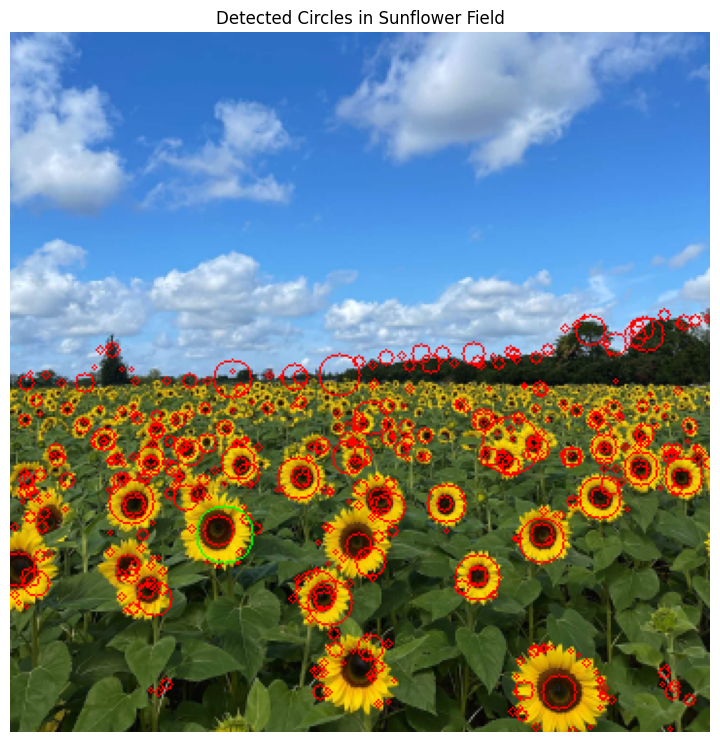

In [39]:
detection_threshold = 0.34 # Threshold for blob detection

# List to store detected circles
detected_circles = []

# Loop through different sigma values (scale-space)
for current_sigma in np.linspace(min_sigma_value, max_sigma_value, num_sigma_values):
    blurred_image = cv2.GaussianBlur(gray_sunflower_image, (0, 0), current_sigma)# Apply Gaussian blur with current sigma
    laplacian_image = cv2.Laplacian(blurred_image, cv2.CV_64F)# Apply Laplacian to the blurred image
    abs_laplacian_image = np.abs(laplacian_image)# Take the absolute value of the Laplacian
    blob_detection_mask = abs_laplacian_image > detection_threshold * abs_laplacian_image.max() # Create a binary mask where blobs are detected (based on threshold)
    contours, _ = cv2.findContours(blob_detection_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)# Find contours in the blob detection mask to detect circles

    # Loop through the detected contours and fit circles
    for contour in contours:
        if len(contour) >= 5:  # Ensure contour has enough points to form a circle
            (x, y), radius = cv2.minEnclosingCircle(contour)
            circle_center = (int(x), int(y))
            radius = int(radius)
            detected_circles.append((circle_center, radius, current_sigma))

# Sort detected circles by radius (largest first)
detected_circles.sort(key=lambda x: -x[1])

# Report the parameters of the largest circle
if detected_circles:
    largest_detected_circle = detected_circles[0]
    circle_center, circle_radius, sigma_value = largest_detected_circle

    print("Parameters of the largest circle:")
    print(f"Center: {circle_center}")
    print(f"Radius: {circle_radius}")
    print(f"Sigma value: {sigma_value}")
else:
    print("No circles were detected.")

# Set line thickness for drawing circles
circle_line_thickness = 1

# Create a copy of the original image for drawing
output_sunflower_image = sunflower_image.copy()

# Draw all detected circles on the output image
for detected_circle in detected_circles:
    circle_center, circle_radius, _ = detected_circle
    cv2.circle(output_sunflower_image, circle_center, circle_radius, (0, 0, 255), circle_line_thickness)  # Red color

# Highlight the largest circle with a different color (green)
if detected_circles:
    largest_detected_circle = detected_circles[0]
    circle_center, circle_radius, _ = largest_detected_circle
    cv2.circle(output_sunflower_image, circle_center, circle_radius, (0, 255, 0), circle_line_thickness)  # Green color for largest circle

#plot both orginal and blob detected images in same line
plt.figure(figsize=(10, 20))
plt.subplot(2, 1, 1)
plt.imshow(cv2.cvtColor(sunflower_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Sunflower Field Image')


# Display the final image with detected circles using matplotlib
plt.figure(figsize=(10, 20))
plt.subplot(2, 1, 2)
plt.imshow(cv2.cvtColor(output_sunflower_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Detected Circles in Sunflower Field')
plt.show()
